In [ ]:
import numpy as np

In [225]:
# Set Flags
DEBUG = False
USE_STORED_DATASET = True

In [244]:
# Utility
def debug_print(*args):
    if DEBUG:
        string = ''
        for arg in args:
            strarg = arg
            if type(arg) != type(''):
                strarg = str(arg)
            string += ' ' + strarg + ' '
        print(string)

# Layers
class Dense:
    def __init__(self, in_size, out_size, act_fwd, act_bwd):
        self.W = np.random.rand(out_size, in_size)*0.1
        self.b = np.random.rand(out_size)*0.1#np.random.rand(in_size)*0.01
        self.act_fwd = act_fwd
        self.act_bwd = act_bwd
        
    def prop_fwd(self, A):
        self.A = A
        debug_print('A', self.A)
        debug_print('W', d2.W)
        self.Z = np.dot(self.W, A)+self.b 
        debug_print('Z', self.Z)
        return self.act_fwd(self.Z)
    
    def prop_bwd(self, dA, Z):
        return self.act_bwd(dA, Z)
        

In [245]:
#Activation and Loss functions
def relu(Z):
    return np.maximum(0,Z)

def relu_grad(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def sigmoid_grad(dA, Z):
    sig = sigmoid(Z)
    return np.convolve(dA, sig * (1 - sig), 'same')#dA * sig * (1 - sig)

def tanh(Z):
    t=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    return t

def tanh_grad(dA, Z):
    t=tanh(Z)
    dt=1-t**2
    return dA * dt

def softmax(Z):
    eZ = np.exp(Z - np.max(Z))
    return eZ / eZ.sum(axis=0)

def softmax_grad(dA, Z):
    s = softmax(Z)
    s = Z.reshape(-1,1)
    jacobian = (np.diagflat(s) - np.dot(s, s.T))
    debug_print(dA.shape)
    debug_print(jacobian.shape)
    return np.matmul(dA, jacobian)

def binary_crossentropy_loss(Y_hat, Y): #binary cross entropy
    m = Y_hat.shape[0]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)
    
def binary_crossentropy_loss_grad(Y_hat, Y): #binary cross entropy
    eps = 1e-8
    return -(np.divide(Y, Y_hat+eps) - np.divide(1 - Y, 1 - Y_hat+eps))
    
def multi_cross_entropy(X,y):
    #TODO
    pass

def multi_cross_entropy_grad(X,y):
    #TODO
    pass

In [246]:
#Simple verbose debugging example
d1 = Dense(8,4,tanh, tanh_grad)
d2 = Dense(4,2,softmax, softmax_grad)
y = np.array([1.0, 0.0])
DEBUG=True
for i in range(7):
    debug_print('------FWD------')
    y_hat = 1-d2.prop_fwd(d1.prop_fwd(np.ones(8)))
    debug_print('Y_hat', y_hat)
    alpha = 1.0e-7
    
    debug_print('\n------BWD------')
    debug_print('D2')
    dA = binary_crossentropy_loss_grad(y_hat, y)
    debug_print('dA', dA)
    dZ = d2.prop_bwd(dA, d2.Z)
    debug_print('dZ', dZ)
    dW = np.array([np.array([np.sum(d2.A)*z]) for z in dZ])/d2.A.shape[0]
    debug_print('dW', dW)
    db = np.sum(dZ, axis=0, keepdims=True)/d2.A.shape[0]
    dA = np.dot(d2.W.T, dZ)
    debug_print('PRE', d2.W)
    d2.W -= dW#*alpha
    debug_print('POST', d2.W)
    d2.b -= db#*alpha
    
    debug_print('D1')
    debug_print('dA', dA)
    dZ = d1.prop_bwd(dA, d1.Z)
    #print(dZ.shape)
    debug_print('dZ', dZ)
    dW = np.array([np.array([np.sum(d1.A)*z]) for z in dZ])/d1.A.shape[0]
    debug_print('dW', dW)
    db = np.sum(dZ, axis=0, keepdims=True)/d1.A.shape[0]
    dA = np.dot(d1.W.T, dZ)
    debug_print('PRE', d1.W)
    d1.W -= dW*alpha
    debug_print('POST', d1.W)
    d1.b -= db*alpha
DEBUG=False

 ------FWD------ 
 A  [1. 1. 1. 1. 1. 1. 1. 1.] 
 W  [[0.03941965 0.05595143 0.04650456 0.02802767]
 [0.09932232 0.02476941 0.02380977 0.00593888]] 
 Z  [0.41646597 0.52609053 0.48616142 0.64923837] 
 A  [0.39394904 0.482387   0.45116449 0.57115702] 
 W  [[0.03941965 0.05595143 0.04650456 0.02802767]
 [0.09932232 0.02476941 0.02380977 0.00593888]] 
 Z  [0.17671352 0.08068476] 
 Y_hat  [0.47601124 0.52398876] 
 
------BWD------ 
 D2 
 dA  [-2.10079068  2.10079068] 
 (2,) 
 (2, 2) 
 dZ  [-0.33558859  0.18577885] 
 dW  [[-0.15929195]
 [ 0.0881826 ]] 
 PRE  [[0.03941965 0.05595143 0.04650456 0.02802767]
 [0.09932232 0.02476941 0.02380977 0.00593888]] 
 POST  [[ 0.1987116   0.21524338  0.20579651  0.18731962]
 [ 0.01113972 -0.0634132  -0.06437283 -0.08224373]] 
 D1 
 dA  [ 0.0052232  -0.01417503 -0.01118305 -0.00830245] 
 dZ  [ 0.00441258 -0.01087654 -0.00890674 -0.00559402] 
 dW  [[ 0.00441258]
 [-0.01087654]
 [-0.00890674]
 [-0.00559402]] 
 PRE  [[0.03217669 0.01396868 0.0998395  0.054958

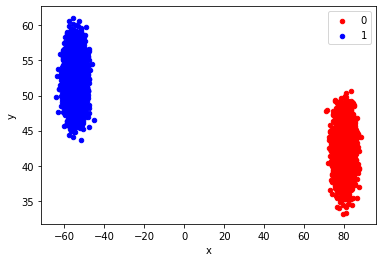

In [232]:
# Generate Dataset
# You might have to do this several times, not all datasets seem
# to have a distribution that can be handled by this simple NN.
# I recommend storing exampls of particular intrest on disk for later usage.
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

num_classes = 2
num_features = 8

if not USE_STORED_DATASET:
    X, y = make_blobs(n_samples=10000, centers=num_classes, n_features=num_features, cluster_std=0.25, shuffle=True)
    X*=10
    Y = np.zeros(shape = (len(y), num_classes))
    for ind, label in enumerate(y):
        Y[ind][label] = 1.0
        
    with open( "X.p", "wb" ) as ofile:
        pickle.dump(X, ofile)

    with open( "y.p", "wb" ) as ofile:
        pickle.dump(y, ofile)

elif USE_STORED_DATASET:
    with open( "X.p", "rb" ) as ofile:
        X = pickle.load(ofile)

    with open( "y.p", "rb" ) as ofile:
        y = pickle.load(ofile)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


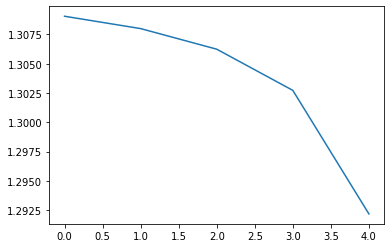

train accuracy 1.0


In [233]:
#X = (X-X.min())/(X.max()-X.min())
#Gradient Descent
layers = [
    Dense(num_features, 4,tanh, tanh_grad),
    Dense(4,2, tanh, tanh_grad),
    Dense(2, num_classes, softmax, softmax_grad)]

epochs = 5
alpha = 1.0e-2
iteration_loss = []
epoch_loss = []
DEBUG=False
for i  in range(epochs):
    #alpha *=1/10
    for j, sample in enumerate(X):
        intermediate = sample
        for layer in layers:
            intermediate = layer.prop_fwd(intermediate)
        Y_hat = 1 - intermediate #TODO: figure why i need to do this
        iteration_loss.append(binary_crossentropy_loss(Y_hat, Y[j]))
        
        dA = binary_crossentropy_loss_grad(Y_hat, Y[j])
        layers.reverse()
        updW = []
        updB = []
        for k, layer in enumerate(layers):
            dZ = layer.prop_bwd(dA, layer.Z)
            dW = np.array([np.array([np.sum(layer.A)*z]) for z in dZ])/layer.A.shape[0]
            db = np.sum(dZ, axis=0, keepdims=True)/layer.A.shape[0]
            dA = np.dot(layer.W.T, dZ)
            updW.append(dW*alpha)
            updB.append(db*alpha)
        
        for k, W in enumerate(updW):
            layers[k].W -= W
            layers[k].b -= updB[k]
            
        layers.reverse()
    epoch_loss.append(np.array(iteration_loss).mean())
        
        
correct = 0
epoch_loss.reverse()#TODO: fix loss reversa
pyplot.plot(epoch_loss) 
pyplot.show()
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1
print('train accuracy', correct/len(y))

In [234]:
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
        #print(Y_hat)
    
    DEBUG=False
    debug_print('NN:', np.around(Y_hat, decimals=5), 'LABEL:',Y[j])
    DEBUG=False
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1

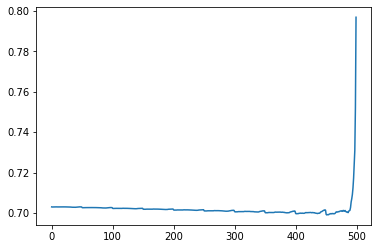

train accuracy 1.0


In [240]:
#Batch Gradient Descent
layers = [
    Dense(num_features, 4,tanh, tanh_grad),
    #Dense(4,2, tanh, tanh_grad),
    Dense(4, num_classes, softmax, softmax_grad)]

batch_size = 200
epochs = 500#int(len(X)/batch_size)
alpha = 1.0e-2
iteration_loss = []
epoch_loss = []
DEBUG=False
batch_no = 0
for i  in range(epochs):
    if (batch_no+1)*batch_size > len(X):
        batch_no=0
    dA = 0.0
    for j, sample in enumerate(X[batch_no*batch_size:(batch_no+1)*batch_size]):
        intermediate = sample
        for layer in layers:
            intermediate = layer.prop_fwd(intermediate)
        Y_hat = 1 - intermediate #TODO: figure why i need to do this
        iteration_loss.append(binary_crossentropy_loss(Y_hat, Y[j]))
        dA += binary_crossentropy_loss_grad(Y_hat, Y[j])
        
    layers.reverse()
    updW = [0]*len(layers)
    updB = [0]*len(layers)
    for k, layer in enumerate(layers):
        dZ = layer.prop_bwd(dA/batch_size, layer.Z)
        dW = np.array([np.array([np.sum(layer.A)*z]) for z in dZ])/layer.A.shape[0]
        db = np.sum(dZ, axis=0, keepdims=True)/layer.A.shape[0]
        dA = np.dot(layer.W.T, dZ)
        updW[k] += dW
        updB[k] += db
    
    for k, W in enumerate(updW):
        #print(W)
        layers[k].W -= alpha*W
        layers[k].b -= alpha*updB[k]
    layers.reverse()

    epoch_loss.append(np.array(iteration_loss).mean())
    batch_no+=1
        
correct = 0
epoch_loss.reverse()#TODO: fix loss reversa
pyplot.plot(epoch_loss) 
pyplot.show()
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1
print('train accuracy', correct/len(y))

In [239]:
for j, x in enumerate(X):
    Y_hat = x
    for layer in layers:
        Y_hat = layer.prop_fwd(Y_hat)
        #print(Y_hat)
    
    DEBUG=False
    debug_print('NN:', np.around(Y_hat, decimals=5), 'LABEL:',Y[j])
    DEBUG=False
    if (np.around(Y_hat, decimals=0) == Y[j]).all():
        correct+=1